In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# importing Dataset
data = pd.read_csv("Desktop/Projects Data_set/stroke_prediction.csv")

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [19]:
#  Feature Engineering:


# 1) Taking care of missing values.
data.isnull().sum()

# Inspecting the overall pattern of BMI without rows having missing values in it.
data_bmi = data[data["bmi"] != None]["bmi"]
data_bmi.describe()

# filling the unknown value with mean of bmi column.
bmi_mean = data["bmi"].mean()
data["bmi"].fillna(bmi_mean,inplace=True)


data.drop(data[data["gender"]=="Other"].index,axis=0,inplace=True)

# EDA

In [21]:

data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [30]:
data.drop(data[data["gender"]=="Other"].index,axis=0,inplace=True)

<AxesSubplot:xlabel='gender'>

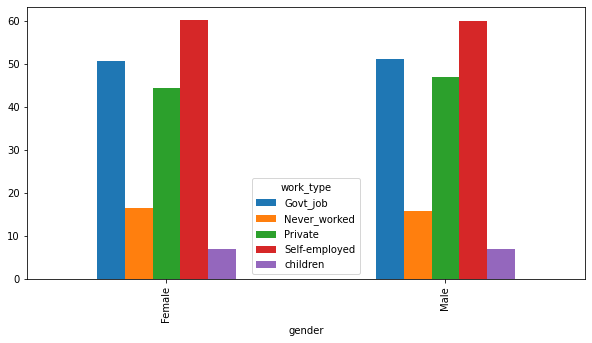

In [76]:
# 1) Grouping the gender and work type we can understand the average age of male and female in each work type.

data.groupby(["gender","work_type"])["age"].mean().unstack().plot(kind="bar",figsize=(10,5))

<AxesSubplot:title={'center':'BMI'}, xlabel='gender', ylabel='BMI - level'>

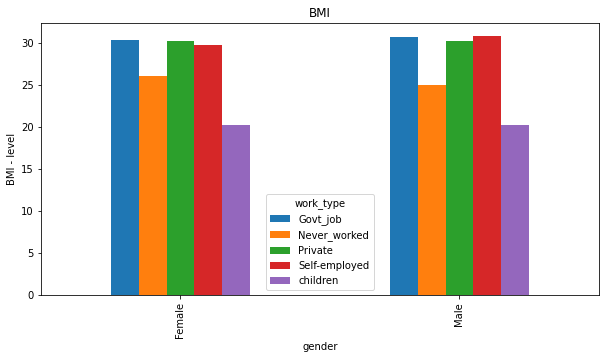

In [77]:
# 2) Grouping the gender and work type we can understand the average bmi of male and female in each work type.

# finding - 1) In female's, who worked for govt. has highest bmi level and for Male's it is equal for govt. and self employeed.

data.groupby(["gender","work_type"])["bmi"].mean().unstack().plot(kind="bar",figsize=(10,5),ylabel="BMI - level",title="BMI")


In [22]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<AxesSubplot:xlabel='gender', ylabel='Glucose level'>

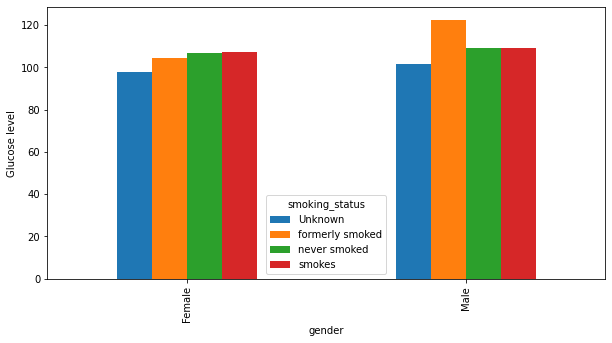

In [78]:
#3) By Grouping gender with smoking status, we can understand the average glucose level.

# findings - 1) In female's who smoked previously has higher glucose level. 2) In Male who had smoked previously has higest glucose level

data.groupby(["gender","smoking_status"])["avg_glucose_level"].mean().unstack().plot(kind="bar",figsize=(10,5),ylabel="Glucose level")

<AxesSubplot:xlabel='gender', ylabel='bmi level'>

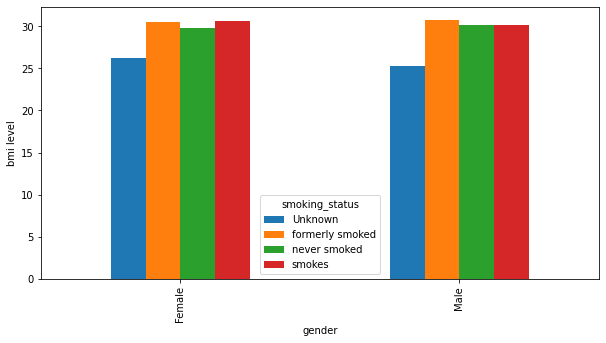

In [79]:
#4) By Grouping gender with smoking status, we can understand the average bmi level.

data.groupby(["gender","smoking_status"])["bmi"].mean().unstack().plot(kind="bar",figsize=(10,5),ylabel="bmi level")

In [67]:
#5) By grouping gender with smoking status we can find the total people had stroke.

data.groupby(["gender","smoking_status"])["stroke"].count().unstack()

smoking_status,Unknown,formerly smoked,never smoked,smokes
gender,,,,
Female,836,477,1229,452
Male,708,407,663,337


<AxesSubplot:xlabel='gender'>

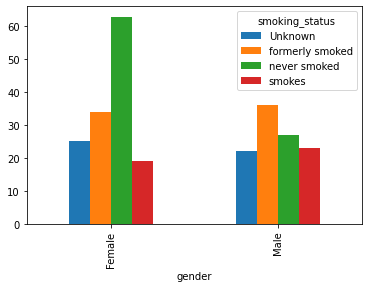

In [73]:
# 6) We had counted total number of people had stroke based on gender and smoking status.

new_data = data[data["stroke"] == 1]
new_data.groupby(["gender","smoking_status"])["stroke"].count().unstack().plot(kind="bar")

<AxesSubplot:xlabel='gender'>

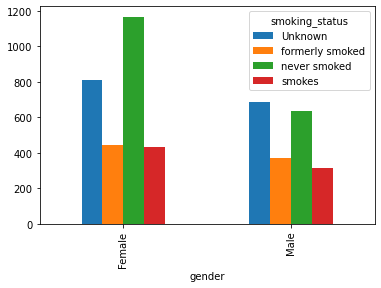

In [75]:
# 7) We had counted total number of people had don't stroke based on gender and smoking status.

new_data = data[data["stroke"] == 0]
new_data.groupby(["gender","smoking_status"])["stroke"].count().unstack().plot(kind="bar")

In [80]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [81]:
data.gender.unique()

array(['Male', 'Female'], dtype=object)

In [84]:
# Creating Dummy Variables for dataset.
data_dummy = pd.get_dummies(data)

In [85]:
data_dummy

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.893237,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,44873,81.0,0,0,125.20,40.000000,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,19723,35.0,0,0,82.99,30.600000,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,37544,51.0,0,0,166.29,25.600000,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [93]:
x = data_dummy.drop("stroke",axis=1)
y = data_dummy["stroke"]

In [94]:
# Spliting dataset in train and test set.
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=42,random_state=42)

In [95]:
# Scaling the dataset.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

In [103]:
# 1) Classification Algorithm 1 - Logistic Regression 

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred,y_test)* 100

print(f"Logistic Regression Accuracy : {accuracy}")



Logistic Regression Accuracy : 97.61904761904762


In [104]:
# 2) Classification Algorithm 1 - RandomForest classifier

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred,y_test) * 100

print(f"Random Forest Classifier Accuracy : {accuracy}")

Random Forest Classifier Accuracy : 97.61904761904762


In [105]:
# 3) Classification Algorithm 1 - Decision tree classifier 

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred,y_test)* 100

print(f"Decision tree Classifier Accuracy Accuracy : {accuracy}")


Decision tree Classifier Accuracy Accuracy : 90.47619047619048


In [107]:
# 4) Classification Algorithm 1 - Naive Bayes 

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred,y_test)* 100

print(f"Naive Bayes Classifier Accuracy : {accuracy}")

Naive Bayes Classifier Accuracy : 38.095238095238095


In [108]:
# 5) Classification Algorithm 1 - KNeighbors classifier

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred,y_test)* 100

print(f"Kneighbors classifier Accuracy : {accuracy}")

Kneighbors classifier Accuracy : 97.61904761904762


In [ ]:
# RESULTS: Logistic regression and Random Forest Classifier has highest accuracy - 97.61904761904762